In [90]:
from bs4 import BeautifulSoup
import requests
import csv

In [2]:
url = "https://www.everythingmom.com/activities/math-riddles-for-kids"

In [3]:
r = requests.get(url)

In [4]:
soup = BeautifulSoup(r.content)

In [104]:
riddles = soup.findAll('blockquote',attrs={"class":"wp-block-quote"})
answers = soup.findAll('cite')
sno = 1

In [105]:
with open("Riddle_Data.csv","w",newline='') as R:
    writer = csv.writer(R)
    writer.writerow(['SNo','Questions','Hints','Answers'])
    

In [106]:
for ri,an in zip(riddles,answers):
    question = ri.find('p').text
    answers = an.get_text()
    with open("Riddle_Data.csv",'a',newline='') as R:
        writer = csv.writer(R)
        writer.writerow([sno,question,answers,0])
    sno+=1    

In [1]:
import pandas as pd
import numpy as np

In [2]:
csv = pd.read_csv("Riddle_Data.csv")
pd.set_option('display.max_colwidth', None)

In [3]:
csv

,SNo,Questions,Hints,Answers,DigitsCount
0,1,X is an odd number. Take an alphabet away from X and it becomes even. Which is that number?,Answer: Seven (Seven-S=Even),7,1
1,2,"A grandmother, two mothers, and two daughters went to a baseball game together and bought one ticket each. How many tickets did they buy in total?",Answer: 3 tickets (the grandmother is also a mother and the mother is also a daughter),3,1
2,3,"At the time of shipping, Tom can place 10 small boxes or 8 large boxes into a carton. A total of 96 boxes were sent in one shipment. The number of small boxes was less than large boxes. What is the total number of cartons he shipped?",Answer: 11 cartons 4 small boxes (410 = 40 boxes) 7 large boxes (78 = 56 boxes) So 96 boxes and 11 total cartons,11,2
3,4,"When Miguel was 6 years old, his little sister, Leila, was half is age. If Miguel is 40 years old today, how old is Leila?",Answer: She is 37 years old.,37,2
4,5,You are given 3 positive numbers. You can add these numbers and multiply them together. The result you get will be the same. Which are the numbers?,"Answer: 1, 2 and 3",123,3
5,6,Tom was asked to paint the number of plates on 100 apartments which means he will have to paint numbers 1 through 100. Can you figure out the number of times he will have to paint the number 8?,"Answer: 20 times. (8, 18, 28, 38, 48, 58, 68, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 98)",20,2
6,7,What is the maximum possible number of times you can subtract number 5 from number 25?,"Answer: Only once. This is because when you subtract 5 from 25 for the first time, it becomes number 20, then 15 and so on.",1,1
7,8,"Leon works at the aquarium. When he tries to put each turtle in its own tank, he has one turtle too many. But if he puts two turtles per tank, he has on tank too many. How many turtles and how many tanks does Leon have?",Answer: He has 3 tanks and 4 turtles,34,2
8,9,A 300 ft. train is traveling 300 ft. per minute must travel through a 300 ft. long tunnel. How long will it take the train to travel through the tunnel?,Answer: Two minutes. It takes the front of the train one minute and the rest of the train will take two minutes to clear the tunnel.,2,1
9,10,I am a three-digit number. My second digit is 4 times bigger than the third digit. My first digit is 3 less than my second digit. Who am I?,Answer: 141,141,3


In [7]:
type(csv["DigitsCount"][10])

numpy.int64

In [5]:
len(csv)

21

In [6]:
r = np.random.randint(0,20,1)
print(r)

[9]


In [7]:
ans = r

In [12]:
ans =(csv["Questions"][r]).to_string()
type(ans)

str

In [14]:
print(ans[3:])

   I am a three-digit number. My second digit is 4 times bigger  than the third digit. My first digit is 3 less than my second digit. Who  am I? 


In [34]:
import csv
no=1
with open('Riddle_Data.csv', 'r') as file:
    reader = csv.reader(file, delimiter = '\t')
    main = [row for idx,row in enumerate(reader) if idx==no]
    print(main)

[['1, X is an odd number. Take an alphabet away from X and it becomes even. Which is that number? , Answer: Seven (Seven-S=Even) ,7,1']]


In [30]:
reader["SNo"]

TypeError: '_csv.reader' object is not subscriptable

In [35]:
main

[['1, X is an odd number. Take an alphabet away from X and it becomes even. Which is that number? , Answer: Seven (Seven-S=Even) ,7,1']]

In [38]:
main[0]

['1, X is an odd number. Take an alphabet away from X and it becomes even. Which is that number? , Answer: Seven (Seven-S=Even) ,7,1']

In [15]:
ans

'9     I am a three-digit number. My second digit is 4 times bigger  than the third digit. My first digit is 3 less than my second digit. Who  am I? '

In [19]:
a=csv["DigitsCount"][1]

In [20]:
type(a)

numpy.int64

In [22]:
print(a)

1


In [45]:
ans =(csv["Answers"][r]).to_string()

In [47]:
ab=ans[3:]

In [8]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('Digit_Recognition_Model_2.model')  # Load our trained model

1


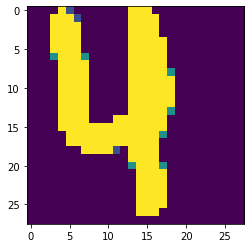

In [13]:
answ=[]
image = cv2.imread('images/Captured1.png')  # read the saved input on canvas which is stores as image
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)  # convert to grayscale

digit=cv2.resize(grey,(28,28))
digiti=digit.reshape((1,28,28,1))
prediction = model.predict((digiti))  # Predict the digit using our model after reshaping the digit to the dimensions the model is trained on
ans = np.argmax(prediction)  # convert the predicted array to a readable forma
print(ans)
plt.imshow(digit)

In [68]:
answ

[3, 3]

3


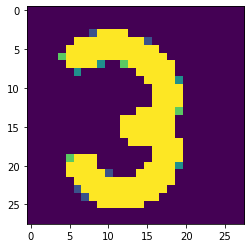

In [73]:
threshh = cv2.resize(thresh,(28,28))
plt.imshow(threshh)
pr=model.predict(threshh.reshape(1,28,28,1))
print(np.argmax(pr))

1


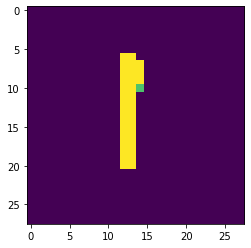

In [17]:
image = cv2.imread('images/Captured2.png')  # read the saved input on canvas which is stores as image
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)  # convert to grayscale
contours, _ = cv2.findContours(grey.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
        x, y, w, h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(image, (x, y), (x + w, y + h), color=(0, 255, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        mean = w + h
        mean = mean / 2
        if (w > h):
            m = abs(mean - h)
            height = int(y + h + m)
            width = int(x + w - m)
            digit = grey[y:height, x:width]
        elif (h > w):
            m = abs(mean - w)
            height = int(y + h - m)
            width = int(x + w + m)
            digit = grey[y:height, x:width]
        elif (h == w):
            digit = grey[y:y + h, x:x + w]

        # ResiImport the libraries to create a GUI Applicationzing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)


digiti=padded_digit.reshape((1,28,28,1))
prediction = model.predict((digiti))  # Predict the digit using our model after reshaping the digit to the dimensions the model is trained on
ans = np.argmax(prediction)  # convert the predicted array to a readable forma
print(ans)
plt.imshow(padded_digit)

In [9]:
from gtts import gTTS
import os

In [49]:
m = "X is an odd number. Take an alphabet away from X and it becomes even. Which is that number?"
m2 ="A group of students were standing in the blazing sun facing due west on a march past event. The leader shouted at them: Right turn! About turn! Left turn! At the end of these commands, in which direction is the students facing now? East-1, West-2, North-3, South-4"
language ="en"

In [50]:
myobj = gTTS(text=m2,lang=language,slow=False)

In [51]:
myobj.save("test.mp3")

In [52]:
os.system("test.mp3")

32512

In [38]:
from playsound import playsound

In [55]:
playsound("test.mp3")

In [62]:
csv["Questions"][0]

' X is an odd number. Take an alphabet away from X and it becomes even. Which is that number? '

In [71]:
for i in range(15,21):
    myobj=gTTS(text=csv["Questions"][i],lang="en",slow=False)
    myobj.save("sounds/Ques{}.mp3".format(i))
    print("done")

done
done
done
done
done
done


In [72]:
csv["Hints"][0]

' Answer: Seven (Seven-S=Even) '

In [74]:
for i in range(1,21):
    myobj=gTTS(text=csv["Hints"][i],lang="en",slow=False)
    myobj.save("sounds/Ans{}.mp3".format(i))
    print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [8]:
csv["Questions"][0]

' X is an odd number. Take an alphabet away from X and it becomes even. Which is that number? '

In [48]:
myobj = gTTS(text="Riddle game!  Learn, Play, Improve Altogether",lang="en",slow=False)

In [49]:
myobj.save("sounds/Open.wav")

In [62]:
playsound("sounds/Open.wav")


In [64]:
from pygame import mixer
mixer.init()

In [68]:
c=mixer.music.load("sounds/Open.wav")
mixer.music.play(c)

error: Unknown WAVE format

In [47]:
p.start()

In [61]:
import sounddevice as sd

OSError: PortAudio library not found

In [69]:
QuesNo = np.random.randint(0, 20, 1)

In [74]:
print(str(int(QuesNo)))

13


In [76]:
import os
os.environ['SDL_AUDIODRIVER'] = 'dsp'